<a href="https://colab.research.google.com/github/mattemugno/seai_project/blob/master/gts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# German Traffic Signs Detection  
## Cargo 2017

## GTSDB dataset analysis
GTSDB is German traffic signs dataset and can be downloaded from [GTSDB](http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset)

In [ ]:
!pip install tensorflow-object-detection-api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.4 MB/s eta 0:00:00
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844486 sha256=4b0e4406a1881b4a34953d909b50b899a1671ba3f064431dd6223c5b248d92c9
  Stored in directory: /root/.cache/pip/wheels/8a/55/68/c084bc2cd93c41fd8f7e2ef9e6bbcb2c35a3e4b49e42044d02
Successfully built tensorflow-object-detection-api


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir /content/dataset
!unzip -d '/content/dataset' '/content/drive/Shareddrives/seai_project/FullIJCNN2013.zip'

Archive:  /content/drive/Shareddrives/seai_project/FullIJCNN2013.zip
   creating: /content/dataset/FullIJCNN2013/
   creating: /content/dataset/FullIJCNN2013/00/
  inflating: /content/dataset/FullIJCNN2013/00000.ppm  
  inflating: /content/dataset/FullIJCNN2013/00001.ppm  
  inflating: /content/dataset/FullIJCNN2013/00002.ppm  
  inflating: /content/dataset/FullIJCNN2013/00003.ppm  
  inflating: /content/dataset/FullIJCNN2013/00004.ppm  
  inflating: /content/dataset/FullIJCNN2013/00005.ppm  
  inflating: /content/dataset/FullIJCNN2013/00006.ppm  
  inflating: /content/dataset/FullIJCNN2013/00007.ppm  
  inflating: /content/dataset/FullIJCNN2013/00008.ppm  
  inflating: /content/dataset/FullIJCNN2013/00009.ppm  
  inflating: /content/dataset/FullIJCNN2013/00010.ppm  
  inflating: /content/dataset/FullIJCNN2013/00011.ppm  
  inflating: /content/dataset/FullIJCNN2013/00012.ppm  
  inflating: /content/dataset/FullIJCNN2013/00013.ppm  
  inflating: /content/dataset/FullIJCNN2013/00014.ppm 

Images with at least one traffic sign: 741
Images with no traffic sign: 159
Train has traffic signs class numbers: 43
Total traffic signs in images: 1213
38    88
12    85
13    83
2     81
10    80
1     79
4     68
8     57
5     53
7     41
9     41
11    38
18    38
14    32
25    31
3     30
17    29
23    20
35    20
6     19
26    18
30    16
33    16
15    15
28    14
22    13
34    12
42    11
40    10
36     9
20     9
16     8
32     8
41     7
39     6
29     5
21     5
24     5
0      4
27     3
37     2
19     2
31     2
Name: id, dtype: int64


<Axes: >

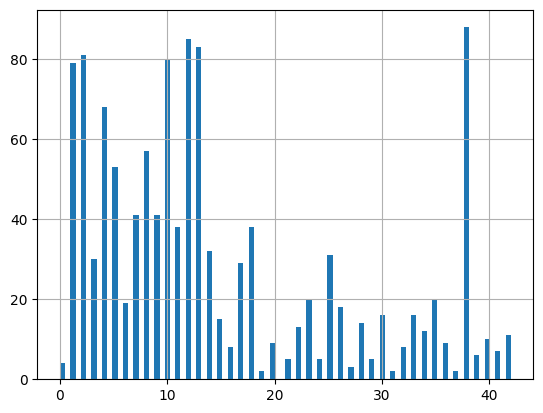

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

import os
os.getcwd()

# TrainIJCNN2013    '../data/TrainIJCNN2013/gt.txt'
#data = pd.read_csv('../data/TrainIJCNN2013/gt.txt', sep=";", header=None)

# FullIJCNN2013     '../data/FullIJCNN2013/gt.txt'
data = pd.read_csv('/content/dataset/FullIJCNN2013/gt.txt', sep=";", header=None)
data.columns = ["img", "x1", "y1", "x2", "y2", "id"]
#data=data[:3]

print("Images with at least one traffic sign:", len(data['img'].unique()))
print("Images with no traffic sign:", 900 - len(data['img'].unique()))
print("Train has traffic signs class numbers:", len(data['id'].unique()))
print("Total traffic signs in images:", data['id'].count())
#pd.value_counts(data['id'], sort=False).plot.bar()
print(pd.value_counts(data['id'], sort=True))
data['id'].hist(bins=86)

## StratifiedShuffleSplit

In [ ]:
#coding=utf-8
from PIL import Image
import os

data_dir = '/content/dataset'
#train_img_dir = os.path.join(data_dir, 'TrainIJCNN2013')
train_img_dir = os.path.join(data_dir, 'FullIJCNN2013')
jpg_img_dir = os.path.join(data_dir, 'jpeg_FullJCNN2013')


if os.path.exists(jpg_img_dir):
    shutil.rmtree(jpg_img_dir)
os.makedirs(jpg_img_dir)

for img_name in os.listdir(train_img_dir):
#for img_name in ["00000.ppm","00001.ppm","00002.ppm"]:
    if img_name[-3:] == "ppm":
        img_path = os.path.join(train_img_dir, img_name)
        img = Image.open(img_path)
        png_path = os.path.join(jpg_img_dir, img_name[:-3]+'jpeg')
        print(png_path)
        img.save(png_path)
        #img.show()

/content/dataset/jpeg_FullJCNN2013/00640.jpeg
/content/dataset/jpeg_FullJCNN2013/00587.jpeg
/content/dataset/jpeg_FullJCNN2013/00113.jpeg
/content/dataset/jpeg_FullJCNN2013/00164.jpeg
/content/dataset/jpeg_FullJCNN2013/00573.jpeg
/content/dataset/jpeg_FullJCNN2013/00485.jpeg
/content/dataset/jpeg_FullJCNN2013/00717.jpeg
/content/dataset/jpeg_FullJCNN2013/00159.jpeg
/content/dataset/jpeg_FullJCNN2013/00529.jpeg
/content/dataset/jpeg_FullJCNN2013/00033.jpeg
/content/dataset/jpeg_FullJCNN2013/00109.jpeg
/content/dataset/jpeg_FullJCNN2013/00233.jpeg
/content/dataset/jpeg_FullJCNN2013/00771.jpeg
/content/dataset/jpeg_FullJCNN2013/00488.jpeg
/content/dataset/jpeg_FullJCNN2013/00778.jpeg
/content/dataset/jpeg_FullJCNN2013/00449.jpeg
/content/dataset/jpeg_FullJCNN2013/00173.jpeg
/content/dataset/jpeg_FullJCNN2013/00338.jpeg
/content/dataset/jpeg_FullJCNN2013/00239.jpeg
/content/dataset/jpeg_FullJCNN2013/00646.jpeg
/content/dataset/jpeg_FullJCNN2013/00756.jpeg
/content/dataset/jpeg_FullJCNN2013

           img    x1   y1    x2   y2  id
274  00566.ppm   655  395   689  429   9
232  00418.ppm   455  537   488  566  22
220  00870.ppm  1030  441  1050  461   5
           img   x1   y1    x2   y2  id
250  00223.ppm  816  334   858  374   1
17   00377.ppm  236  532   277  573  10
325  00722.ppm  992  330  1049  381  23


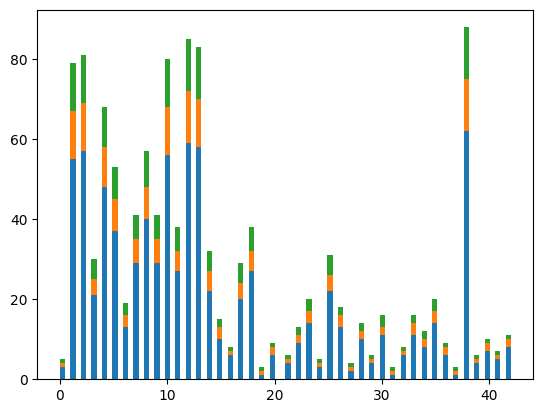

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

%matplotlib inline

data = pd.read_csv('/content/dataset/FullIJCNN2013/gt.txt', sep=";", header=None)
data.columns = ["img", "x1", "y1", "x2", "y2", "id"]

def stratifiedshufflesplit(data, test_size=0.3, thres=1):
    y_less = data.groupby("id").filter(lambda x: len(x) <= thres)
    data = pd.concat([data, y_less], ignore_index=True)

    sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size)
    train_index, test_index = next(sss.split(data, data['id']))
    xtrain, xtest = data.iloc[train_index], data.iloc[test_index]
    #print(xtest['id'].value_counts())
    return xtrain, xtest

xtrain, xt = stratifiedshufflesplit(data, 0.3, 1)
xtest, xval = stratifiedshufflesplit(xt, 0.5, 1)
print(xtest.head(3))
print(xval.head(3))

plt.hist([
        xtrain['id'],
        #xt['id'],
        xtest['id'],
        xval['id']
        ],
        stacked=True,
        label=["train", "test", "val"],
        bins=86
    )

plt.show()

xtrain['width'] = 1360
xtrain['height'] = 800
xtest['width'] = 1360
xtest['height'] = 800
xval['width'] = 1360
xval['height'] = 800

xtrain.to_csv('/content/dataset/jpeg_FullJCNN2013/train.csv', index=False)
xtest.to_csv('/content/dataset/jpeg_FullJCNN2013/test.csv', index=False)
xval.to_csv('/content/dataset/jpeg_FullJCNN2013/val.csv', index=False)

## Create Record and copy test images

In [ ]:
from google.protobuf import text_format
from object_detection.protos import string_int_label_map_pb2

label_map = string_int_label_map_pb2.StringIntLabelMap()

with open('/content/drive/MyDrive/pretrained_gtsdb/tf_saved_model/gtsdb_label_map.pbtxt', 'r') as f:
    pbtxt_string = f.read()

text_format.Merge(pbtxt_string, label_map)
label_map_dict = {}
for item in label_map.item:
    label_map_dict[item.id] = item.name

print(label_map_dict)

{1: 'speed_limit_20', 2: 'speed_limit_30', 3: 'speed_limit_50', 4: 'speed_limit_60', 5: 'speed_limit_70', 6: 'speed_limit_80', 7: 'restriction_ends_80', 8: 'speed_limit_100', 9: 'speed_limit_120', 10: 'no_overtaking', 11: 'no_overtaking_trucks', 12: 'priority_at_next_intersection', 13: 'priority_road', 14: 'give_way', 15: 'stop', 16: 'no_traffic_both_ways', 17: 'no_trucks', 18: 'no_entry', 19: 'danger', 20: 'bend_left', 21: 'bend_right', 22: 'bend', 23: 'uneven_road', 24: 'slippery_road', 25: 'road_narrows', 26: 'construction', 27: 'traffic_signal', 28: 'pedestrian_crossing', 29: 'school_crossing', 30: 'cycles_crossing', 31: 'snow', 32: 'animals', 33: 'restriction_ends', 34: 'go_right', 35: 'go_left', 36: 'go_straight', 37: 'go_right_or_straight', 38: 'go_left_or_straight', 39: 'keep_right', 40: 'keep_left', 41: 'roundabout', 42: 'restriction_ends_overtaking', 43: 'restriction_ends_overtaking_trucks'}


In [ ]:
import os
import hashlib
import io
import random
import shutil
import configparser
import pylab as plt
import tensorflow as tf
from tqdm import tqdm
from lxml import etree
from PIL import Image, ImageDraw, ImageFont
from object_detection.utils import dataset_util
from object_detection.utils import label_map_util
from collections import namedtuple, OrderedDict
import pandas as pd
from shutil import copyfile


def create_tf_record(examples_list, output_filename):

    writer = tf.io.TFRecordWriter(output_filename)
    for tf_example in examples_list:
        writer.write(tf_example.SerializeToString())
    writer.close()
    print("Successful created record files")

def save_img_with_box(image, group, img_name, gt_label):

    for index, row in group.object.iterrows():
        x1 = row['x1']
        x2 = row['x2']
        y1 = row['y1']
        y2 = row['y2']
        label = gt_label[int(row['id'])+1]

        box = (x1, y1), (x2, y2)
        #print(box, label, img_name)
        #font = ImageFont.truetype(cf.get('font_path', 'simsun'), 20)
        drawObject = ImageDraw.Draw(image)
        drawObject.rectangle(box, outline = "red")
        drawObject.text([x1+20, y1+20], label,"red")

    save_dir = target_dir
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    image.save(os.path.join(save_dir, img_name))
    #plt.imshow(image)
    #plt.show()

def get_label_dict(label_path):
    label_map_dict = {}
    with open(label_path, 'r', encoding="utf-8") as f:
        lines = f.readlines()
        for line in lines:
            if not line.split():
                continue
            line = line.strip()
            number, name = line.split(' ', 1)
            #print(number, name)
            label_map_dict[int(number)] = name
    return label_map_dict

def dict_to_tf_example(img_path,
                       group,
                       gt_label,
                       ignore_difficult_instances=False):
    """Convert gt derived dict to tf.Example proto.
    Notice that this function normalizes the bounding box coordinates provided
    by the raw data.
    """
    with tf.io.gfile.GFile(img_path, 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)

    width, height = image.size
    #print(image.size)
    #print(width, height)

    filename = (group.img[:-3] + 'png')
    image_format = b'png'
    xmin = []
    ymin = []
    xmax = []
    ymax = []
    classes = []
    classes_text = []

    for index, row in group.object.iterrows():
        #print(row['id'], gt_label[int(row['id'])+1])
        xmin.append(row['x1'] / width)
        xmax.append(row['x2'] / width)
        ymin.append(row['y1'] / height)
        ymax.append(row['y2'] / height)
        classes_text.append(gt_label[int(row['id'])+1].encode('utf8'))
        classes.append(int(row['id'])+1)

    if save_img:
        save_img_with_box(image, group, filename, gt_label)

    example = tf.train.Example(features=tf.train.Features(feature={
      'image/height': dataset_util.int64_feature(height),
      'image/width': dataset_util.int64_feature(width),
      'image/filename': dataset_util.bytes_feature(filename.encode('utf8')),
      'image/source_id': dataset_util.bytes_feature(filename.encode('utf8')),
      'image/encoded': dataset_util.bytes_feature(encoded_jpg),
      'image/format': dataset_util.bytes_feature(image_format),
      'image/object/bbox/xmin': dataset_util.float_list_feature(xmin),
      'image/object/bbox/xmax': dataset_util.float_list_feature(xmax),
      'image/object/bbox/ymin': dataset_util.float_list_feature(ymin),
      'image/object/bbox/ymax': dataset_util.float_list_feature(ymax),
      'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
      'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return example

def split(df, group):
    data = namedtuple('data', ['img', 'object'])
    gb = df.groupby(group)
    return [data(img, gb.get_group(x)) for img, x in zip(gb.groups.keys(), gb.groups)]

def csv_record(csv, gt_label, out='out.record'):

    examples = pd.read_csv(csv)
    grouped = split(examples, 'img')
    out_examples = []
    #print(grouped[:5])
    for group in grouped:
        img_path = os.path.join(train_img_dir, group.img)
        img_path = img_path[:-3] + "jpeg"
        #print(group.img)
        tf_example = dict_to_tf_example(img_path, group, gt_label)
        out_examples.append(tf_example)

    output_dir = os.path.join(data_dir, 'records')
    if not os.path.exists(output_dir):
        os.mkdir(output_dir)
    output = os.path.join(output_dir, out)
    create_tf_record(out_examples, output)
    print(out + ' has been successful created')

def main():
    '''
    train imgs eg:    ./data/TrainIJCNN2013/00039.ppm
    train gt:         ./data/TrainIJCNN2013/train.csv
    test imgs eg:     ./data/TestIJCNN2013/00043.ppm
    train.csv:
        img,x1,y1,x2,y2,id,width,height
        00246.ppm,1091,354,1134,396,10,1360,800
    '''

    # get label information
    # label id = gt id + 1
    gt_label = label_map_dict
    #print(gt_label[3])

    csv_record(train_gt_path, gt_label, 'train.record')
    csv_record(val_gt_path, gt_label, 'val.record')
    csv_record(val_gt_path, gt_label, 'test.record')

    # copy images from test.csv to test_samples
    examples = pd.read_csv(test_gt_path)
    grouped = split(examples, 'img')
    #print(grouped[:5])
    #for group in grouped:
    #    img_path = os.path.join(train_img_dir, group.img)
    #    img_path = img_path[:-3] + "png"
    #    img_out = os.path.join(test_img_dir, group.img)
    #    img_out = img_out[:-3] + "png"
    #    copyfile(img_path, img_out)


save_img = True
data_dir = '/content/dataset'
train_img_dir = os.path.join(data_dir, 'jpeg_FullJCNN2013')
test_img_dir = os.path.join(data_dir, 'test_samples')
target_dir = os.path.join(data_dir, 'input_img_vis_test')
train_gt_path = os.path.join(train_img_dir, 'train.csv')
val_gt_path = os.path.join(train_img_dir, 'val.csv')
test_gt_path = os.path.join(train_img_dir,'test.csv')
label_path = os.path.join(data_dir, 'gtsdb.label')
cf = configparser.ConfigParser()
cf.read('../config/traffic.config')


if __name__ == '__main__':

    main()

Successful created record files
train.record has been successful created
Successful created record files
val.record has been successful created
Successful created record files
test.record has been successful created


In [ ]:
!cp '/content/dataset/records/train.record' '/content/drive/MyDrive/pretrained_gtsdb'
!cp '/content/dataset/records/val.record' '/content/drive/MyDrive/pretrained_gtsdb'
!cp '/content/dataset/records/test.record' '/content/drive/MyDrive/pretrained_gtsdb'